# Środowiska uruchomieniowe C3. Streamlit 2.
#### Celem tego ćwiczenia jest przedstawienie w uproszczeniu procesu trenowania kilku podstawowych modeli ML. Wykorzystamy słynny zbiór danych z Kaggle - Titanic - Machine Learning from Disaster. Więcej informacji o tych danych można znaleźć na stronie internetowej - https://www.kaggle.com/c/titanic/data 

### 1. Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import imblearn
import fastbook
import wandb


from fastbook import *
from fastai.vision.widgets import *

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.decomposition import PCA

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,PowerTransformer,RobustScaler,Normalizer
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score, precision_score
from collections import Counter


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif


C:\Users\saras\anaconda3\envs\SUML2\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


### 2. Przygotowanie danych do analizy

In [2]:
os.getcwd()

'C:\\Users\\saras\\Documents\\SUML_cw2'

In [3]:
# wandb.init(project="suml_project", entity="quc")

In [4]:
base_data = pd.read_csv("pancreatic.csv",sep=";");
base_data.columns
# na tym etapie tworzymy nową zmienną, którą nazywamy base_data, zawierającą nasz zbiór danych

cols = ["age","sex","plasma_CA19_9","creatinine","LYVE1","REG1B","TFF1","REG1A","diagnosis"]
data = base_data[cols].copy()
# tworzymy kopię naszych danych bez zbędnych kolumn (np. PassengerID i Name)

In [5]:
print(data)

     age sex  plasma_CA19_9  creatinine     LYVE1       REG1B         TFF1  \
0     33   F           11.7     1.83222  0.893219   52.948840   654.282174   
1     81   F            NaN     0.97266  2.037585   94.467030   209.488250   
2     51   M            7.0     0.78039  0.145589  102.366000   461.141000   
3     61   M            8.0     0.70122  0.002805   60.579000   142.950000   
4     62   M            9.0     0.21489  0.000860   65.540000    41.088000   
..   ...  ..            ...         ...       ...         ...          ...   
585   68   M            NaN     0.52026  7.058209  156.241000   525.178000   
586   71   F            NaN     0.85956  8.341207   16.915000   245.947000   
587   63   M            NaN     1.36851  7.674707  289.701000   537.286000   
588   75   F            NaN     1.33458  8.206777  205.930000   722.523000   
589   74   M         1488.0     1.50423  8.200958  411.938275  2021.321078   

         REG1A  diagnosis  
0     1262.000          1  
1      

In [6]:
data.isnull().any()
# sprawdzamy czy mamy jakiekolwiek brakujące dane

age              False
sex              False
plasma_CA19_9     True
creatinine       False
LYVE1            False
REG1B            False
TFF1             False
REG1A             True
diagnosis        False
dtype: bool

#### Możemy wygenerować mapę ciepła symbolizującą braki danych - każdy "pomarańczowy pasek" to miejsce, w którym jest brak danych

<AxesSubplot:>

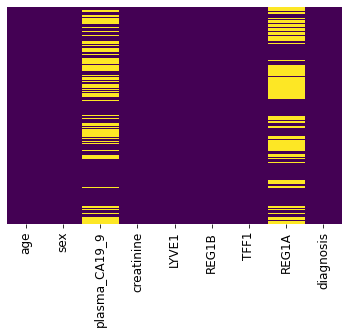

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# cbar ustalamy jako false, ponieważ nie wniesie nam to dodatkowych informacji

In [8]:
# Transformations and additions
data["plasma_CA19_9"].fillna((-1), inplace=True) # wypełni nam brakujące informacje średnią
data["REG1A"].fillna((-1), inplace=True) # wypełni nam brakujące informacje średnią

#data["wzrost"].fillna((data["wzrost"].mean()), inplace=True) # wypełni nam brakujące informacje średnią

In [9]:
data.isnull().any()

age              False
sex              False
plasma_CA19_9    False
creatinine       False
LYVE1            False
REG1B            False
TFF1             False
REG1A            False
diagnosis        False
dtype: bool

In [10]:
print(data)

     age sex  plasma_CA19_9  creatinine     LYVE1       REG1B         TFF1  \
0     33   F           11.7     1.83222  0.893219   52.948840   654.282174   
1     81   F           -1.0     0.97266  2.037585   94.467030   209.488250   
2     51   M            7.0     0.78039  0.145589  102.366000   461.141000   
3     61   M            8.0     0.70122  0.002805   60.579000   142.950000   
4     62   M            9.0     0.21489  0.000860   65.540000    41.088000   
..   ...  ..            ...         ...       ...         ...          ...   
585   68   M           -1.0     0.52026  7.058209  156.241000   525.178000   
586   71   F           -1.0     0.85956  8.341207   16.915000   245.947000   
587   63   M           -1.0     1.36851  7.674707  289.701000   537.286000   
588   75   F           -1.0     1.33458  8.206777  205.930000   722.523000   
589   74   M         1488.0     1.50423  8.200958  411.938275  2021.321078   

         REG1A  diagnosis  
0     1262.000          1  
1      

In [11]:
encoder = LabelEncoder()
# data.loc[:,"patient_cohort"] = encoder.fit_transform(data.loc[:,"patient_cohort"])
# # male = 1, female = 0

# encoder = LabelEncoder()
# data.loc[:,"sample_origin"] = encoder.fit_transform(data.loc[:,"sample_origin"])

encoder = LabelEncoder()
data.loc[:,"sex"] = encoder.fit_transform(data.loc[:,"sex"])


In [12]:
print(data)

     age  sex  plasma_CA19_9  creatinine     LYVE1       REG1B         TFF1  \
0     33    0           11.7     1.83222  0.893219   52.948840   654.282174   
1     81    0           -1.0     0.97266  2.037585   94.467030   209.488250   
2     51    1            7.0     0.78039  0.145589  102.366000   461.141000   
3     61    1            8.0     0.70122  0.002805   60.579000   142.950000   
4     62    1            9.0     0.21489  0.000860   65.540000    41.088000   
..   ...  ...            ...         ...       ...         ...          ...   
585   68    1           -1.0     0.52026  7.058209  156.241000   525.178000   
586   71    0           -1.0     0.85956  8.341207   16.915000   245.947000   
587   63    1           -1.0     1.36851  7.674707  289.701000   537.286000   
588   75    0           -1.0     1.33458  8.206777  205.930000   722.523000   
589   74    1         1488.0     1.50423  8.200958  411.938275  2021.321078   

         REG1A  diagnosis  
0     1262.000         

### 3. Eksploracja danych

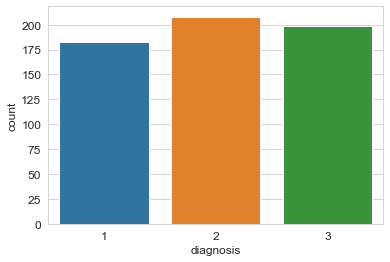

In [13]:
sns.set_style('whitegrid')
plot=sns.countplot(x='diagnosis',data=data)
plot_fig=plot.get_figure()
plot_fig.savefig("output.png")

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

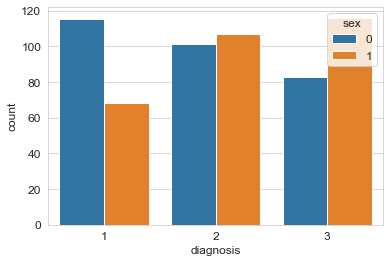

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',hue='sex',data=data)
# możemy też wygenerować taki wykres, który powie nam więcej o płci osób, które nie przeżyły

In [15]:
class_count_0, class_count_1, class_count_2 = data['diagnosis'].value_counts()
class_0 = data[data['diagnosis'] == 1]
class_1 = data[data['diagnosis'] == 2]
class_2 = data[data['diagnosis'] == 3]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 1:', class_2.shape)

class 0: (183, 9)
class 1: (208, 9)
class 1: (199, 9)


Classes are balanced so we do not have to deal with imbalanced data :)

In [16]:
print(data)

     age  sex  plasma_CA19_9  creatinine     LYVE1       REG1B         TFF1  \
0     33    0           11.7     1.83222  0.893219   52.948840   654.282174   
1     81    0           -1.0     0.97266  2.037585   94.467030   209.488250   
2     51    1            7.0     0.78039  0.145589  102.366000   461.141000   
3     61    1            8.0     0.70122  0.002805   60.579000   142.950000   
4     62    1            9.0     0.21489  0.000860   65.540000    41.088000   
..   ...  ...            ...         ...       ...         ...          ...   
585   68    1           -1.0     0.52026  7.058209  156.241000   525.178000   
586   71    0           -1.0     0.85956  8.341207   16.915000   245.947000   
587   63    1           -1.0     1.36851  7.674707  289.701000   537.286000   
588   75    0           -1.0     1.33458  8.206777  205.930000   722.523000   
589   74    1         1488.0     1.50423  8.200958  411.938275  2021.321078   

         REG1A  diagnosis  
0     1262.000         

### 4. Trenowanie modelu

We are using classfiers that should perform 

In [17]:
data = data.astype(float)
y = data.iloc[:,8] # survived - zmienna, którą będziemy chcieli przewidzieć
x = data.iloc[:,0:8] # zmienne na podstawie, których chcemy przewidzieć
print(x)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# test size odnosi się do liczby obserwacji przeznaczonej do wytrenowania modelu
print(Counter(y_train))
print(Counter(y_test))

      age  sex  plasma_CA19_9  creatinine     LYVE1       REG1B         TFF1  \
0    33.0  0.0           11.7     1.83222  0.893219   52.948840   654.282174   
1    81.0  0.0           -1.0     0.97266  2.037585   94.467030   209.488250   
2    51.0  1.0            7.0     0.78039  0.145589  102.366000   461.141000   
3    61.0  1.0            8.0     0.70122  0.002805   60.579000   142.950000   
4    62.0  1.0            9.0     0.21489  0.000860   65.540000    41.088000   
..    ...  ...            ...         ...       ...         ...          ...   
585  68.0  1.0           -1.0     0.52026  7.058209  156.241000   525.178000   
586  71.0  0.0           -1.0     0.85956  8.341207   16.915000   245.947000   
587  63.0  1.0           -1.0     1.36851  7.674707  289.701000   537.286000   
588  75.0  0.0           -1.0     1.33458  8.206777  205.930000   722.523000   
589  74.0  1.0         1488.0     1.50423  8.200958  411.938275  2021.321078   

         REG1A  
0     1262.000  
1    

In [39]:
#Cross validation
from numpy import mean
from sklearn.preprocessing import QuantileTransformer

kf = KFold(n_splits=3, random_state=42, shuffle=True)

imba_pipeline_gbc_base = make_pipeline(
                            GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,     max_depth=1, random_state=42))

# #standarization 
# imba_pipeline_gbc_base_ss = make_pipeline(QuantileTransformer(n_quantiles=10, random_state=0),
#                             GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,     max_depth=1, random_state=0))

#StandardScaler,MinMaxScaler,MaxAbsScaler,PowerTransformer,RobustScaler,Normalizer
imba_pipeline_gbc_base_ss = make_pipeline(MaxAbsScaler(),
                            GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,     max_depth=1, random_state=42))


imba_pipeline_rfc_base = make_pipeline(
                              RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced'))

imba_pipeline_rfc_base_ss = make_pipeline(MaxAbsScaler(),
                              RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced'))

#Random Forest is agnostic to data standarization and normalization

dc_clsf = DecisionTreeClassifier()

knn_clsf = KNeighborsClassifier()

#standarization
pipeline_knn_base_ss = make_pipeline(QuantileTransformer(n_quantiles=10, random_state=42),  KNeighborsClassifier())

# pipeline_knn_base_ss_pca = make_pipeline(QuantileTransformer(n_quantiles=10, random_state=0), PCA(n_components=5),  KNeighborsClassifier())
#no no gain from using pca ,dimensionality
#MinMaxScaler(),StandardScaler() performed poorly

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)


In [40]:
classfiers= [imba_pipeline_gbc_base,imba_pipeline_gbc_base_ss,imba_pipeline_rfc_base,imba_pipeline_rfc_base_ss,dc_clsf,knn_clsf,pipeline_knn_base_ss,clf]

for clsf in classfiers:
    score_clsf=cross_val_score(clsf, X_train, y_train, scoring='f1_micro', cv=kf)
    print(score_clsf,mean(score_clsf))
    
    clsf.fit(X_train, y_train)
    y_test_predict_clsf = clsf.predict(X_test)
    print(" F1 Score: ",f1_score(y_test,y_test_predict_clsf,average='micro'))
    
#imba_pipeline_rfc_base.fit(X_train, y_train)
#y_test_predict_rfc_base_s=imba_pipeline_rfc_base.predict(X_test)
#y_test_predict_gbc_base_s = imba_pipeline_gbc_base.predict(X_test)


[0.64556962 0.67515924 0.66242038] 0.6610497460291865
 F1 Score:  0.7203389830508474
[0.64556962 0.67515924 0.66242038] 0.6610497460291865
 F1 Score:  0.7203389830508474
[0.67088608 0.7133758  0.70063694] 0.6949662716009568
 F1 Score:  0.7627118644067796
[0.67721519 0.71974522 0.70063694] 0.6991991184928378
 F1 Score:  0.7711864406779662
[0.63924051 0.66878981 0.60509554] 0.6377086188825284
 F1 Score:  0.6016949152542372
[0.59493671 0.59872611 0.61783439] 0.6038324061382999
 F1 Score:  0.6610169491525424
[0.64556962 0.59872611 0.64968153] 0.6313257545217555
 F1 Score:  0.6440677966101694
[0.42405063 0.46496815 0.34394904] 0.41098927678787384
 F1 Score:  0.5084745762711864


 F1 Score:  0.7203389830508474
              precision    recall  f1-score   support

         1.0       0.62      0.84      0.71        31
         2.0       0.67      0.59      0.63        44
         3.0       0.89      0.77      0.82        43

    accuracy                           0.72       118
   macro avg       0.73      0.73      0.72       118
weighted avg       0.74      0.72      0.72       118

 F1 Score:  0.7711864406779662
              precision    recall  f1-score   support

         1.0       0.70      0.84      0.76        31
         2.0       0.73      0.61      0.67        44
         3.0       0.86      0.88      0.87        43

    accuracy                           0.77       118
   macro avg       0.77      0.78      0.77       118
weighted avg       0.77      0.77      0.77       118



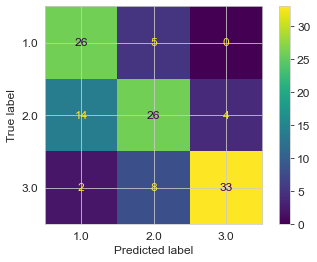

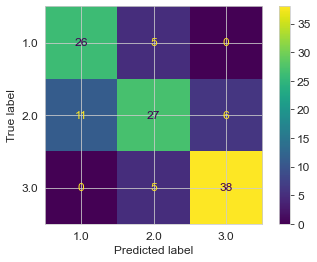

In [43]:
classfiers_sel= [imba_pipeline_gbc_base_ss,imba_pipeline_rfc_base_ss]

for clsf in classfiers_sel:
    clsf.fit(X_train, y_train)
    y_test_predict_clsf = clsf.predict(X_test)
    print(" F1 Score: ",f1_score(y_test,y_test_predict_clsf,average='micro'))
    print(classification_report(y_test,y_test_predict_clsf))
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict_clsf)

In [93]:
# define parametres for hypertuning
params_rfc = {
    'n_estimators': [10,60,100,200], #'n_estimators': [10, 50, 100, 200,500],//[ 75, 100, 125 , 150,],[100, 125 , 150,200,500]
    'max_depth': [10,12,16,18, None], #'max_depth': [4, 6, 10, 12, None],//[3, 4 , 5, None]//4 , 10,16, None
    'random_state': [42],
    'class_weight': ['balanced','balanced_subsample'],
}


params_gbc = {
    'n_estimators': [10,20,30,40,50,60], #  'n_estimators': [50, 100, 200,500],// [ 75, 100, 125 , 150]
    'learning_rate':[0.8,0.9,1,1.1,2], #  'learning_rate':[0.5,1.0,2.0,2.5],//[1.5,2.0,2.5]//1,1.5,2.0
    'max_depth': [3,4,5,6,7, None], #'max_depth': [4, 6, 10, 12, None],//[3, 4 , 5, None]//4, 10, 16,None
    'random_state': [42],
}

new_params_rfc = {'randomforestclassifier__' + key: params_rfc[key] for key in params_rfc}

new_params_gbc = {'gradientboostingclassifier__' + key: params_gbc[key] for key in params_gbc}


grid_imba_rfc_base_ss = GridSearchCV(imba_pipeline_rfc_base_ss, param_grid=new_params_rfc, cv=kf, scoring='accuracy',
                        return_train_score=True)
grid_imba_rfc_base_ss.fit(X_train, y_train);


grid_imba_gbc_base_ss = GridSearchCV(imba_pipeline_gbc_base_ss, param_grid=new_params_gbc, cv=kf, scoring='accuracy',
                        return_train_score=True)
grid_imba_gbc_base_ss.fit(X_train, y_train);


print(grid_imba_gbc_base_ss.best_score_)
print(grid_imba_rfc_base_ss.best_score_)

print(grid_imba_gbc_base_ss.best_params_)
print(grid_imba_rfc_base_ss.best_params_)

0.7098148297454916
0.6991991184928378
{'gradientboostingclassifier__learning_rate': 1, 'gradientboostingclassifier__max_depth': 6, 'gradientboostingclassifier__n_estimators': 30, 'gradientboostingclassifier__random_state': 42}
{'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 12, 'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__random_state': 42}


In [94]:
best_gbc = make_pipeline(MaxAbsScaler(),
                            GradientBoostingClassifier(n_estimators=30, learning_rate=1.0,     max_depth=6, random_state=42))
best_rfc = make_pipeline(MaxAbsScaler(),
                            RandomForestClassifier(n_estimators=200,    max_depth=12, random_state=42, class_weight='balanced'))

0.7098148297454916
 F1 Score:  0.7542372881355932
              precision    recall  f1-score   support

         1.0       0.68      0.81      0.74        31
         2.0       0.69      0.61      0.65        44
         3.0       0.88      0.86      0.87        43

    accuracy                           0.75       118
   macro avg       0.75      0.76      0.75       118
weighted avg       0.76      0.75      0.75       118

0.6991991184928378
 F1 Score:  0.7711864406779662
              precision    recall  f1-score   support

         1.0       0.71      0.87      0.78        31
         2.0       0.73      0.61      0.67        44
         3.0       0.86      0.86      0.86        43

    accuracy                           0.77       118
   macro avg       0.77      0.78      0.77       118
weighted avg       0.77      0.77      0.77       118



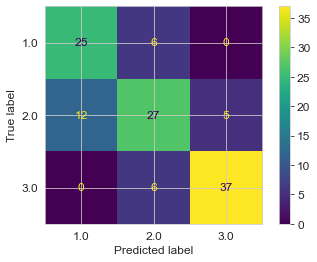

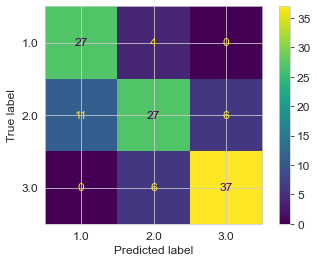

In [95]:
classfiers_sel_ht= [best_gbc,best_rfc]

for clsf in classfiers_sel_ht:
    clsf.fit(X_train.values, y_train)
    score_clsf=cross_val_score(clsf, X_train, y_train, scoring='f1_micro', cv=kf)
    print(mean(score_clsf))
    y_test_predict_clsf = clsf.predict(X_test.values)
    print(" F1 Score: ",f1_score(y_test,y_test_predict_clsf,average='micro'))
    print(classification_report(y_test,y_test_predict_clsf))
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict_clsf)

### Feature importance

[0.11330655 0.01841533 0.2199167  0.10105578 0.17987493 0.13515691 0.15155937 0.08071443]


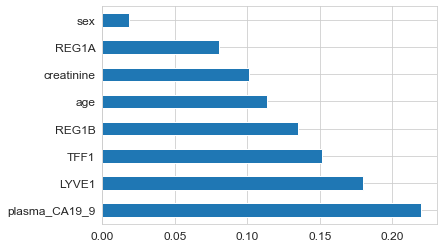

[0.10206416 0.01975358 0.34892915 0.11798245 0.1369527  0.11335099 0.11675025 0.04421673]


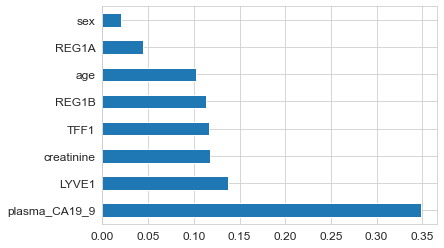

In [111]:
best_rfc.fit(X_train.values, y_train)
print(best_rfc.steps[1][1].feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(best_rfc.steps[1][1].feature_importances_, index=X_train.columns)
feat_im = feat_importances.nlargest(10).plot(kind='barh')
plt.show()
plot_f_im=feat_im.get_figure()
plot_f_im.savefig("f_im1.png")

best_gbc.fit(X_train.values, y_train)
print(best_gbc.steps[1][1].feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(best_gbc.steps[1][1].feature_importances_, index=X_train.columns)
feat_im2 = feat_importances.nlargest(10).plot(kind='barh')
plt.show()
plot_f_im=feat_im2.get_figure()
plot_f_im.savefig("f_im2.png")


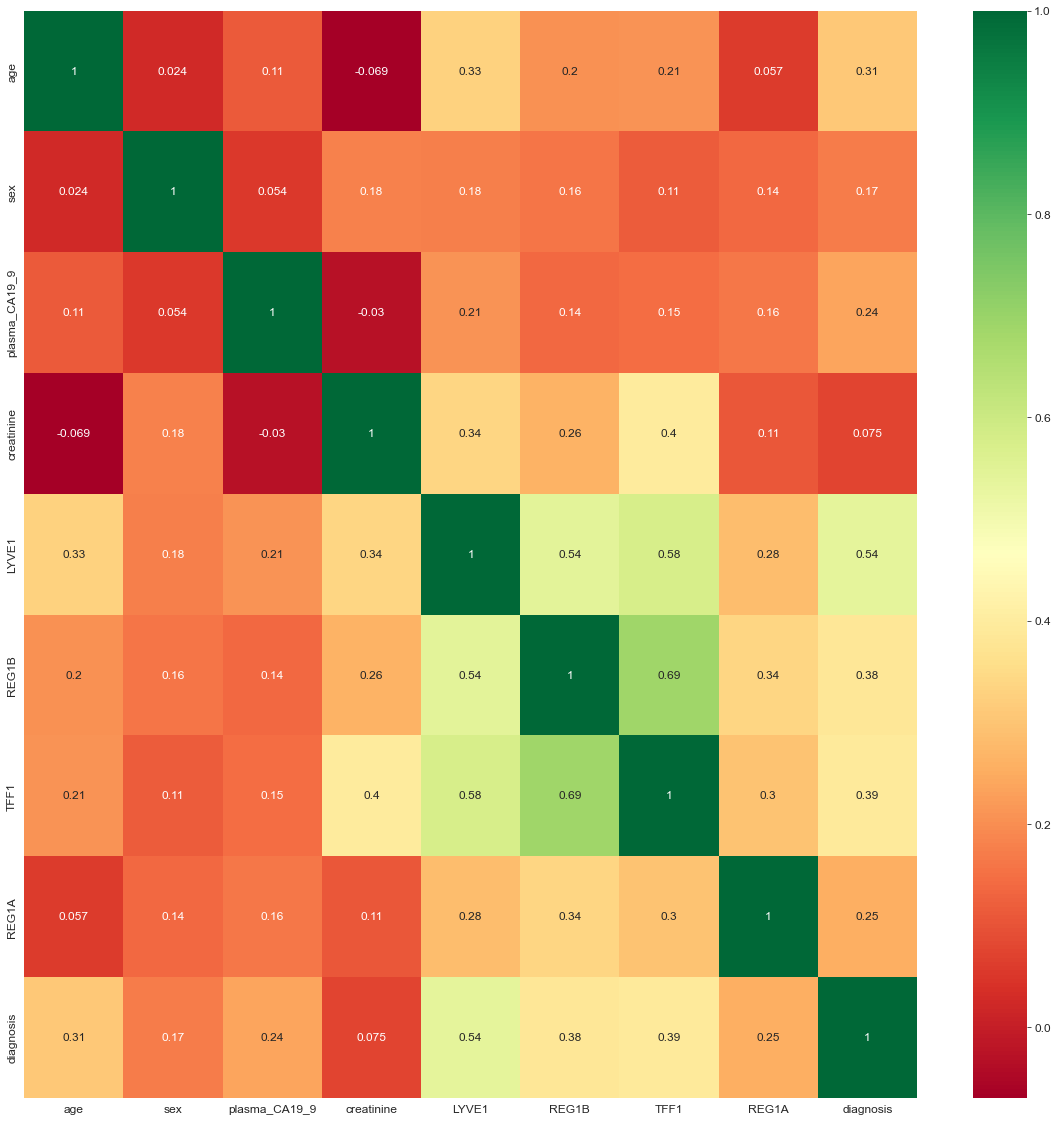

In [112]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn") 
plot_corr_matrix=g.get_figure()
plot_corr_matrix.savefig("corr_matrix.png")


### Feature Selection and reevaluation of the model


In [113]:

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k=7)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

In [114]:
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)



[0.62658228 0.66878981 0.69426752] 0.663213201107259
 F1 Score:  0.7457627118644068
[0.70253165 0.66878981 0.68152866] 0.6842833723023999
 F1 Score:  0.7542372881355932


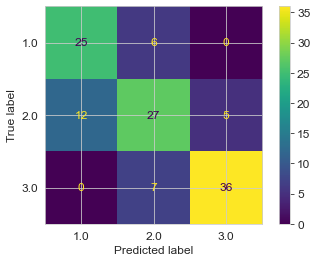

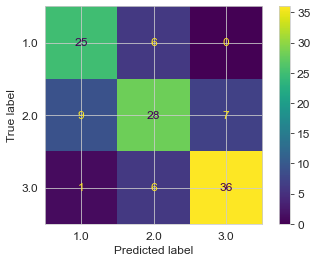

In [122]:
best_gbc_feat_s_in = make_pipeline(MaxAbsScaler(),
                            GradientBoostingClassifier(n_estimators=30, learning_rate=1.0,     max_depth=6, random_state=42))
best_rfc_feat_s_in = make_pipeline(MaxAbsScaler(),
                            RandomForestClassifier(n_estimators=200,    max_depth=12, random_state=42, class_weight='balanced'))

classfiers= [best_gbc_feat_s_in,best_rfc_feat_s_in]

for clsf in classfiers:
    score_clsf=cross_val_score(clsf, X_train_fs, y_train, scoring='f1_micro', cv=kf)
    print(score_clsf,mean(score_clsf))
    
    clsf.fit(X_train_fs, y_train)
    y_test_predict_clsf = clsf.predict(X_test_fs)
    print(" F1 Score: ",f1_score(y_test,y_test_predict_clsf,average='micro'))
    
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict_clsf)

In [123]:

params_rfc_fs = {
    'n_estimators': [100,200,500,600], #'n_estimators': [10, 50, 100, 200,500],//[ 75, 100, 125 , 150,],[100, 125 , 150,200,500]//10,20,30,40,50,60
    'max_depth': [ 6,8, 10, 12, None], #'max_depth': [4, 6, 10, 12, None],//[3, 4 , 5, None]//4 , 10,16, None//8,9,10,11,18, None
    'random_state': [42],
    'class_weight': ['balanced','balanced_subsample'],
}


params_gbc_fs = {
    'n_estimators': [10,30,50, 100], #  'n_estimators': [50, 100, 200,500],// [ 75, 100, 125 , 150]//10,20,30,40,50
    'learning_rate':[0.5,0.8, 1.0, 1,2], #  'learning_rate':[0.5,1.0,2.0,2.5],//[1.5,2.0,2.5]//1,1.5,2.0//0.8,0.9,1,1.1,2
    'max_depth': [4, 6, 8,10, 12, None], #'max_depth': [4, 6, 10, 12, None],//[3, 4 , 5, None]//4, 10, 16,None//2,3,4, None
    'random_state': [42],
}



new_params_rfc_fs = {'randomforestclassifier__' + key: params_rfc_fs[key] for key in params_rfc_fs}

new_params_gbc_fs = {'gradientboostingclassifier__' + key: params_gbc_fs[key] for key in params_gbc_fs}

grid_imba7 = GridSearchCV(imba_pipeline_gbc_base_ss, param_grid=new_params_gbc_fs, cv=kf, scoring='f1_micro',
                        return_train_score=True)
test1 = grid_imba7.fit(X_train_fs, y_train);

grid_imba8 = GridSearchCV(imba_pipeline_rfc_base_ss, param_grid=new_params_rfc_fs, cv=kf, scoring='f1_micro',
                        return_train_score=True)
grid_imba8.fit(X_train_fs, y_train);

print(test1.best_score_)
print(grid_imba8.best_score_)


0.6949528339917762
0.6928162541320648


In [117]:
print(grid_imba7.best_params_)
print(grid_imba8.best_params_)    

{'gradientboostingclassifier__learning_rate': 0.8, 'gradientboostingclassifier__max_depth': 10, 'gradientboostingclassifier__n_estimators': 30, 'gradientboostingclassifier__random_state': 42}
{'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 500, 'randomforestclassifier__random_state': 42}


In [118]:
best_gbc_fs = make_pipeline(MaxAbsScaler(),
                            GradientBoostingClassifier(n_estimators=30, learning_rate=0.8,     max_depth=10, random_state=42))
best_rfc_fs = make_pipeline(MaxAbsScaler(),
                            RandomForestClassifier(n_estimators=500,     max_depth=10, random_state=42, class_weight='balanced_subsample'))

F1 Score:  0.6864406779661016
              precision    recall  f1-score   support

         1.0       0.64      0.74      0.69        31
         2.0       0.60      0.55      0.57        44
         3.0       0.81      0.79      0.80        43

    accuracy                           0.69       118
   macro avg       0.68      0.69      0.69       118
weighted avg       0.69      0.69      0.68       118

F1 Score:  0.7627118644067796
              precision    recall  f1-score   support

         1.0       0.74      0.84      0.79        31
         2.0       0.70      0.64      0.67        44
         3.0       0.84      0.84      0.84        43

    accuracy                           0.76       118
   macro avg       0.76      0.77      0.76       118
weighted avg       0.76      0.76      0.76       118



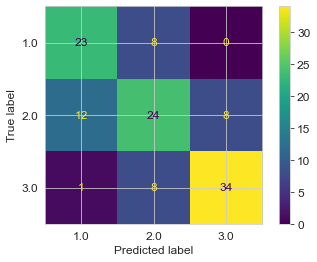

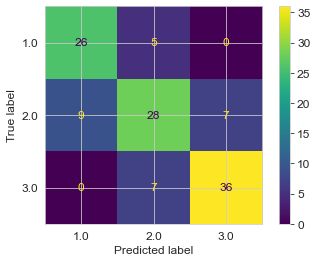

In [119]:
classfiers_fs_sel = [best_gbc_fs,best_rfc_fs]

for clsf in classfiers_fs_sel:
    clsf.fit(X_train_fs, y_train)
    y_test_predict_clsf = clsf.predict(X_test_fs)
    print("F1 Score: ",f1_score(y_test,y_test_predict_clsf,average='micro'))
    print(classification_report(y_test,y_test_predict_clsf))
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict_clsf)


### 5. Export the best model

In [120]:
filename = "best_rfc.sv"
pickle.dump(best_rfc, open(filename,'wb'))

### 6. Test the model on some data

In [121]:
#"patient_cohort","sample_origin","age","sex","plasma_CA19_9","creatinine","LYVE1","REG1B","TFF1","REG1A","diagnosis"
my_data =[
            [
             47,  #"age"
              1, #"sex"
             -1,  #"plasma_CA19_9"
             1.17,  #"creatinine"
             0.8,  #"LYVE1"
             40.08,  #"REG1B"
             600,  #"TFF1"
             -1,  #"REG1A" 
    ]
]
print(best_rfc.predict(my_data))
#print(best_rfc.predict(my_data))


ValueError: X has 8 features, but MaxAbsScaler is expecting 7 features as input.

In [54]:
print(X_test)

      age  sex  plasma_CA19_9  creatinine     LYVE1       REG1B         TFF1  \
225  41.0  1.0       -1.00000     1.32327  1.897387   29.548000    46.814000   
14   56.0  0.0       12.00000     0.91611  0.599645   93.811000    93.576000   
85   64.0  1.0        1.28619     1.06314  0.023728   27.022365    23.728300   
418  64.0  0.0     1972.00000     0.83694  1.406857   13.618654   431.725959   
132  54.0  1.0        6.77000     0.95004  4.616530   54.969010   101.154050   
..    ...  ...            ...         ...       ...         ...          ...   
142  43.0  0.0       -1.00000     0.28275  0.001131   15.280000     0.022055   
298  45.0  1.0       -1.00000     1.10838  1.231025  114.815000   806.238000   
205  50.0  0.0       29.00000     0.92742  1.555825   32.086000   191.499000   
231  40.0  1.0       -1.00000     1.60602  0.318729   19.703000   189.889000   
210  73.0  1.0        9.00000     1.13100  4.860454  704.236000  3283.593000   

       REG1A  
225   -1.000  
14    -1.